# Predicting Survival for Patients with Severe Illness

## Import Data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
support2 = fetch_ucirepo(id=880) 
  
# data (as pandas dataframes) 
dfX = support2.data.features 
dfy = support2.data.targets

df = pd.concat([dfX, dfy], axis=1)

# metadata 
#print(support2.metadata) 
  
# variable information 
#print(support2.variables)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

Some of these features are categorical data, so I have chosen to only include the features that are numerical or can be one-hot encoded.

## Pre-Processing

In [2]:
#Fill NaN values with the suggested ones
df=df.fillna({'alb':3.5,'pafi':333.3,'bili':1.01,'crea':1.01,'bun':6.51,'wblc':9,'urine':2502})

#drop columns for target variables that will not be studied
df=df.drop(columns=['sfdm2','hospdead'])

#drop columns with not enough data
df=df.drop(columns=['adlp', 'adls', 'edu', 'income','glucose','ph'])

#drop columns that don't (intuitively) directly affect survival rates
df=df.drop(columns=['dzclass', 'totcst','totmcst'])


#drop rows with missing data
df=df.dropna(how='any')
df = df.reset_index(drop=True)

In [3]:
#convert categorical data into numerical data, drop_first=True to prevent multicolinearity, 
#     as described here: https://www.kaggle.com/discussions/general/294096
df=pd.get_dummies(df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7237 entries, 0 to 7236
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   7237 non-null   float64
 1   num.co                7237 non-null   int64  
 2   scoma                 7237 non-null   float64
 3   charges               7237 non-null   float64
 4   avtisst               7237 non-null   float64
 5   sps                   7237 non-null   float64
 6   aps                   7237 non-null   float64
 7   surv2m                7237 non-null   float64
 8   surv6m                7237 non-null   float64
 9   hday                  7237 non-null   int64  
 10  diabetes              7237 non-null   int64  
 11  dementia              7237 non-null   int64  
 12  prg2m                 7237 non-null   float64
 13  prg6m                 7237 non-null   float64
 14  dnrday                7237 non-null   float64
 15  meanbp               

# Exploratory Analysis

In [4]:
display(df) #this is our overall dataset
df['hday']

,age,num.co,scoma,charges,avtisst,sps,aps,surv2m,surv6m,hday,...,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,race_black,race_hispanic,race_other,race_white,ca_no,ca_yes,dnr_dnr before sadm,dnr_no dnr
0,62.84998,0,0.0,9715.0,7.000000,33.898438,20.0,0.262939,0.036995,1,...,True,False,False,False,True,False,False,False,False,True
1,52.74698,2,0.0,41094.0,13.000000,20.500000,45.0,0.790894,0.664917,4,...,False,False,False,False,False,True,True,False,False,True
2,42.38498,2,0.0,3075.0,7.000000,20.097656,19.0,0.698975,0.411987,1,...,True,False,False,False,False,True,False,False,False,True
3,79.88495,1,26.0,50127.0,18.666656,23.500000,30.0,0.634888,0.532959,3,...,False,False,False,False,False,True,True,False,False,True
4,93.01599,1,55.0,6884.0,5.000000,19.398438,27.0,0.284973,0.214996,1,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7232,70.42297,4,0.0,80504.0,40.666657,29.398438,60.0,0.531982,0.416992,11,...,False,False,False,False,False,True,False,True,False,False
7233,66.07300,1,0.0,52870.0,20.333328,16.296875,22.0,0.852905,0.801880,13,...,False,False,False,False,False,True,True,False,False,True
7234,55.15399,1,41.0,35377.0,18.000000,25.796875,31.0,0.553955,0.485962,1,...,False,False,False,False,False,True,True,False,False,True
7235,70.38196,1,0.0,46564.0,23.000000,22.699219,39.0,0.741943,0.660889,18,...,False,False,False,False,False,True,True,False,False,True


0        1
1        4
2        1
3        3
4        1
        ..
7232    11
7233    13
7234     1
7235    18
7236    22
Name: hday, Length: 7237, dtype: int64

In [5]:
X=df.drop(columns=['death']) #features
y=df['death'] #target

In [6]:
data=df['death'].groupby(df['num.co'].loc[df['death']==1]).count()/(df['death'].groupby(df['num.co']).count())
data=np.array(data)
data

array([0.49291167, 0.71123452, 0.7026466 , 0.68584071, 0.70881864,
       0.76497696, 0.71604938, 0.7       , 1.        ,        nan])

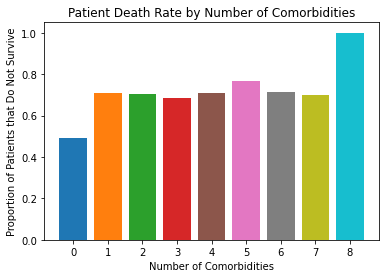

In [7]:
plt.rcParams["figure.figsize"] = (10,6) #for some reason this cell must be run twice for rcParams to work

#features that are correlated with chances of survival, as descirbed by SUPPORT2 description
features=['num.co','adlsc']

width=0.1
x=np.arange(0,10,1)

plt.title("Patient Death Rate by Number of Comorbidities")
plt.xticks(ticks=x)
plt.xlabel("Number of Comorbidities")
plt.ylabel("Proportion of Patients that Do Not Survive")

cmap = plt.get_cmap('tab10')
colors=cmap(np.linspace(0,1,9))

plt.bar(x,data,color=colors)

#plt.savefig('Comorbidities.png', bbox_inches='tight')
plt.show()

In [8]:
#convert adlsc into groups based on their value, so that we can graph it
ranges = [-0.01,0.001,1,2,3,4,5,6,10]

y_ADL=(pd.cut(df[features[1]],ranges)).astype(str)
bins=['(-0.01, 0.001]', '(0.001, 1.0]', '(1.0, 2.0]', '(2.0, 3.0]', '(3.0, 4.0]', '(4.0, 5.0]', '(5.0, 6.0]', '(6.0, 10.0]']

y_ADL=pd.concat([y_ADL,df['death']],axis=1)
y_ADL['adlsc']=y_ADL['adlsc'].replace(bins,np.arange(0,8,1))

data_ADL=y_ADL['death'].groupby(y_ADL['adlsc'].loc[y_ADL['death']==1]).count()
data_ADL

adlsc
0.0    1554
1.0     770
2.0     512
3.0     717
4.0     505
5.0     327
6.0     312
7.0     215
Name: death, dtype: int64

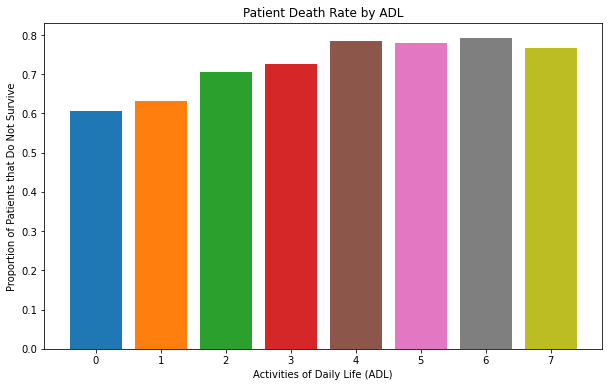

In [9]:
plt.rcParams["figure.figsize"] = (10,6)
#for some reason this cell must be run twice for rcParams to work

#features that are correlated with chances of survival, as descirbed by SUPPORT2 description
features=['num.co','adlsc']


total=y_ADL['death'].groupby(y_ADL['adlsc']).count()

width=0.1
x=np.arange(0,8,1)

plt.title("Patient Death Rate by ADL")
plt.xticks(ticks=x)
plt.xlabel("Activities of Daily Life (ADL)")
plt.ylabel("Proportion of Patients that Do Not Survive")

cmap = plt.get_cmap('tab10')
colors=cmap(np.linspace(0,1,9))

plt.bar(x,data_ADL/total,color=colors)

#plt.savefig('ADL.png', bbox_inches='tight')
plt.show()

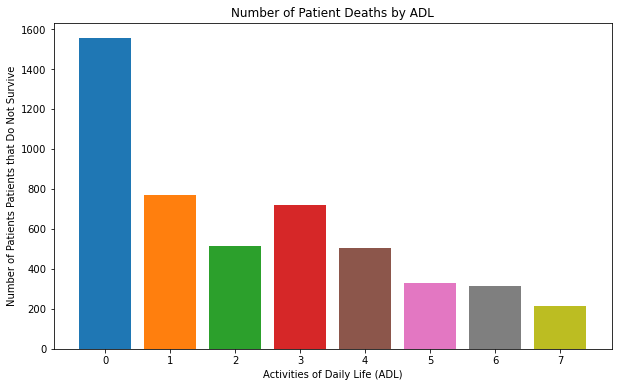

In [10]:
plt.rcParams["figure.figsize"] = (10,6)
#for some reason this cell must be run twice for rcParams to work

#features that are correlated with chances of survival, as descirbed by SUPPORT2 description
features=['num.co','adlsc']

data=df['death'].groupby(df['num.co'].loc[df['death']==1]).count()/(df['death'].groupby(df['num.co']).count())
data=np.array(data)
data

width=0.1
x=np.arange(0,8,1)

plt.title("Number of Patient Deaths by ADL")
plt.xticks(ticks=x)
plt.xlabel("Activities of Daily Life (ADL)")
plt.ylabel("Number of Patients Patients that Do Not Survive")

cmap = plt.get_cmap('tab10')
colors=cmap(np.linspace(0,1,9))

plt.bar(x,data_ADL,color=colors)

#plt.savefig('ADL_tot.png', bbox_inches='tight')
plt.show()

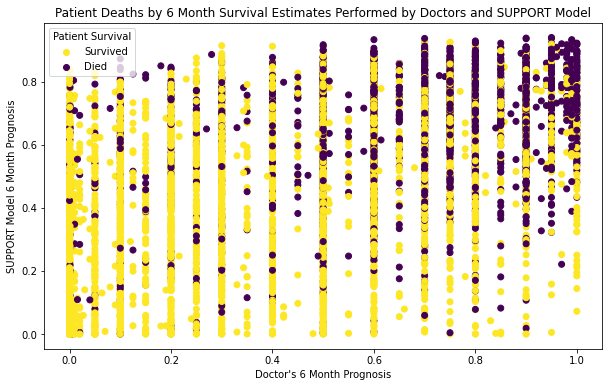

In [11]:
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Patient Deaths by 6 Month Survival Estimates Performed by Doctors and SUPPORT Model")
plt.xlabel("Doctor's 6 Month Prognosis")
plt.ylabel("SUPPORT Model 6 Month Prognosis")

cmap = plt.get_cmap('viridis')
colors2=cmap(np.linspace(0,1,2))

plt.scatter(0,0,color=colors2[1],label='Survived')
plt.scatter(0,0,color=colors2[0],label='Died')

plt.scatter(df['prg6m'],df['surv6m'],c=df['death'])

plt.legend(title='Patient Survival')

#plt.savefig('6m.png', bbox_inches='tight')
plt.show()


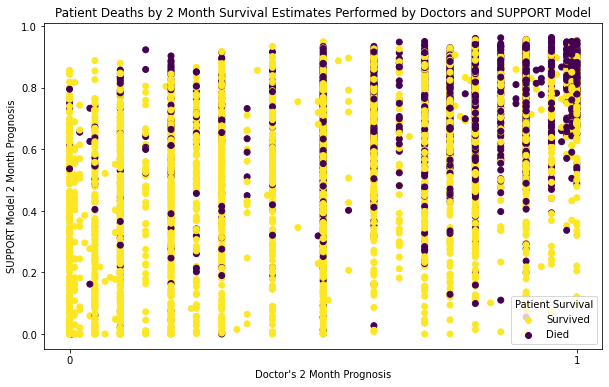

In [12]:
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Patient Deaths by 2 Month Survival Estimates Performed by Doctors and SUPPORT Model")
plt.xticks(ticks=x)
plt.xlabel("Doctor's 2 Month Prognosis")
plt.ylabel("SUPPORT Model 2 Month Prognosis")

cmap = plt.get_cmap('viridis')
colors2=cmap(np.linspace(0,1,2))

plt.scatter(0,0,color=colors2[1],label='Survived')
plt.scatter(0,0,color=colors2[0],label='Died')

plt.scatter(df['prg2m'],df['surv2m'],c=df['death'])

plt.legend(title='Patient Survival')

#plt.savefig('2m.png', bbox_inches='tight')
plt.show()

# Modeling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import copy

r=12

In [14]:
def test_kFold(X_train,model):
    """
        @X = the dataframe containing the features
        Target dataframe is assumed to be y=df['death']

        Performs K=5 fold validation on X and returns the (best RMSE, best model)
    """
    
    kf = KFold(n_splits=5,random_state=r,shuffle=True)
    k = 0
    best_score = np.inf
    
    for train_idx, val_idx in kf.split(X_train,y_train):
        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_val_fold = X_train.iloc[val_idx]
        y_val_fold = y_train.iloc[val_idx]
        
        if(type(model)==RandomForestClassifier):
            pipe = Pipeline([('model', model )])
        else:
            pipe = Pipeline([('scaler', StandardScaler()), ('model', model )])
        pipe.fit(X_train_fold, y_train_fold)
        y_val_pred_lr = pipe.predict(X_val_fold)
    
        score = np.sqrt(np.mean((y_val_fold-y_val_pred_lr)**2))
        k = k + 1
    
        if score < best_score:
            best_model = copy.deepcopy(pipe)
            best_score = score
    return best_score, best_model

In [15]:
def bRMSE(score):
    return "{:.5f}".format(score)

# Test Models

In [16]:
X=df.drop(columns=['death']) #overall features
y=df['death'] #target, stays the same for all models

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r)

X1_train=X_train.drop(columns=['prg2m','prg6m','surv2m','surv6m']) #for creating a model
X2_train=X_train[['surv6m']] #features for testing against SUPPORT model
X3_train=X_train[['prg6m']] #features for testing against Doctors' estimates

X1_test=X_test.drop(columns=['prg2m','prg6m','surv2m','surv6m'])
X2_test=X_test[['surv6m']]
X3_test=X_test[['prg6m']]

In [17]:
score_LSVC,LSVC=test_kFold(X1_train,LinearSVC())
score_rbf,rbf=test_kFold(X1_train,SVC())
score_LR,LR=test_kFold(X1_train,LogisticRegression())
score_RFC,RFC=test_kFold(X1_train,RandomForestClassifier())

score_SUPPORT,SUPPORT=test_kFold(X2_train,LinearSVC())
score_Doctors,Doctors=test_kFold(X3_train,LinearSVC())

In [18]:
print('RMSE Comparison:')
print('Best RMSE  (LinearSVC)    :',bRMSE(score_LSVC))
print('Best RMSE  (RBF SVC)      :',bRMSE(score_rbf))
print('Best RMSE  (Logit)        :',bRMSE(score_LR))
print('Best RMSE  (RFC)          :',bRMSE(score_RFC))
print('Best RMSE  (SUPPORT Model):',bRMSE(score_SUPPORT))
print('Best RMSE  (Doctors)      :',bRMSE(score_Doctors))
print()
print('Score Comparison')
print('Best Score (LinearSVC)    :',LSVC.score(X1_test,y_test))
print('Best Score (RBF SVC)      :',rbf.score(X1_test,y_test))
print('Best Score (Logit)        :',LR.score(X1_test,y_test))
print('Best Score (RFC)          :',RFC.score(X1_test,y_test))
print('Best Score (SUPPORT Model):',SUPPORT.score(X2_test,y_test))
print('Best Score (Doctors)      :',Doctors.score(X3_test,y_test))

RMSE Comparison:
Best RMSE  (LinearSVC)    : 0.45525
Best RMSE  (RBF SVC)      : 0.45809
Best RMSE  (Logit)        : 0.45335
Best RMSE  (RFC)          : 0.46649
Best RMSE  (SUPPORT Model): 0.52238
Best RMSE  (Doctors)      : 0.53000

Score Comparison
Best Score (LinearSVC)    : 0.7693370165745856
Best Score (RBF SVC)      : 0.7582872928176796
Best Score (Logit)        : 0.7693370165745856
Best Score (RFC)          : 0.7596685082872928
Best Score (SUPPORT Model): 0.7161602209944752
Best Score (Doctors)      : 0.7292817679558011


# Analysis

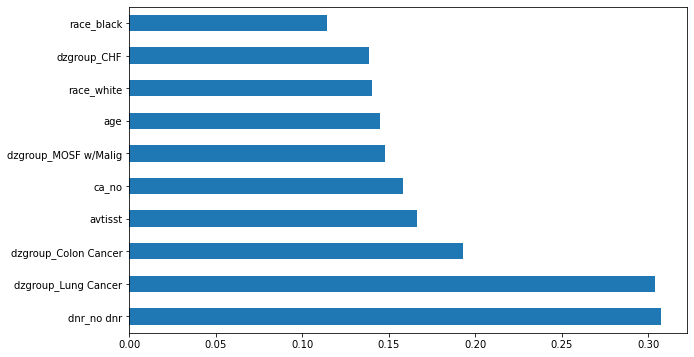

In [19]:
Significance=pd.Series(abs(LSVC[1].coef_[0]), index=X1_test.columns)
x_sig=Significance.nlargest(10)
x_sig.plot(kind='barh')
plt.show()

In [20]:
sig=pd.DataFrame(x_sig)
sig=sig.reset_index()
sig['index']=sig['index'].replace({'dnr_no dnr':'Does not have a DNR',
                        'dzgroup_Lung Cancer':'Has Lung Cancer',
                        'dzgroup_Colon Cancer':'Has Colon Cancer',
                        'avtisst':'Average cost of ICU treatments',
                        'ca_no':'Has No Cancer',
                        'dzgroup_MOSF w/Malig':'Has MOSF w/Malig',
                        'age':'Age',
                        'race_white':'Is White',
                        'dzgroup_CHF':'Has CHF',
                        'race_black':'Is Black'})
sig

,index,0
0,Does not have a DNR,0.307332
1,Has Lung Cancer,0.303963
2,Has Colon Cancer,0.192938
3,Average cost of ICU treatments,0.166496
4,Has No Cancer,0.158007
5,Has MOSF w/Malig,0.147766
6,Age,0.145057
7,Is White,0.140283
8,Has CHF,0.138760
9,Is Black,0.114143


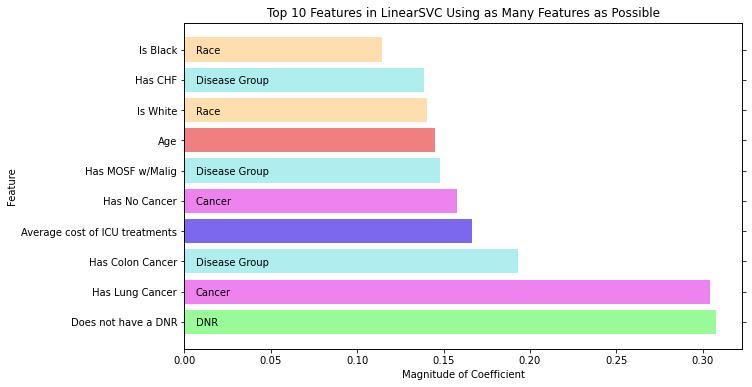

In [21]:
labels2=['Race ',
         'Disease Group ',
         'Race  ',
         ' ',
         'Disease Group  ',
         'Cancer ',
         '  ',
         'Disease Group   ',
         'Cancer',
         'DNR']

colors_sig=['navajowhite',
            'paleturquoise',
            'navajowhite',
            'lightcoral',
            'paleturquoise',
            'violet',
            'mediumslateblue',
            'paleturquoise',
            'violet',
            'palegreen']
fig, ax1 = plt.subplots()
ax1.barh(sig['index'],sig[0],color=colors_sig[::-1])

ax2 = ax1.twinx()
ax2.barh(labels2[::-1],x_sig,alpha=0)
ax2.tick_params(axis='y', which='major', pad=-550)

ax1.set_title('Top 10 Features in LinearSVC Using as Many Features as Possible')
ax1.set_xlabel('Magnitude of Coefficient')
ax1.set_ylabel('Feature')
#plt.savefig('Significance.png', bbox_inches='tight')
plt.show()

In [22]:
X4_train=X_train[['dzgroup_CHF',
       'dzgroup_COPD', 'dzgroup_Cirrhosis', 'dzgroup_Colon Cancer',
       'dzgroup_Coma', 'dzgroup_Lung Cancer', 'dzgroup_MOSF w/Malig',
       'race_black', 'race_hispanic', 'race_other', 'race_white', 'ca_no',
       'ca_yes', 'dnr_dnr before sadm', 'dnr_no dnr','age','avtisst']] #features indicated as important
X4_test=X_test[['dzgroup_CHF',
       'dzgroup_COPD', 'dzgroup_Cirrhosis', 'dzgroup_Colon Cancer',
       'dzgroup_Coma', 'dzgroup_Lung Cancer', 'dzgroup_MOSF w/Malig',
       'race_black', 'race_hispanic', 'race_other', 'race_white', 'ca_no',
       'ca_yes', 'dnr_dnr before sadm', 'dnr_no dnr','age','avtisst']]

score_sig,sig=test_kFold(X4_train,LinearSVC())
print('Best RMSE  (Top Relevant)      :',bRMSE(score_sig))
print('Best Score (Top Relevant)    :',sig.score(X4_test,y_test))

Best RMSE  (Top Relevant)      : 0.47928
Best Score (Top Relevant)    : 0.7424033149171271


In [23]:
X5_train=X_train[['dzgroup_CHF','dzgroup_Colon Cancer','dzgroup_Lung Cancer', 'dzgroup_MOSF w/Malig',
       'race_black', 'race_white', 'ca_no', 'dnr_no dnr','age','avtisst']] #features indicated as important
X5_test=X_test[['dzgroup_CHF','dzgroup_Colon Cancer','dzgroup_Lung Cancer', 'dzgroup_MOSF w/Malig',
       'race_black', 'race_white', 'ca_no', 'dnr_no dnr','age','avtisst']]

score_sig2,sig2=test_kFold(X5_train,LinearSVC())
print('Best RMSE  (Top 10)      :',bRMSE(score_sig2))
print('Best Score (Top 10)    :',sig2.score(X5_test,y_test))

Best RMSE  (Top 10)      : 0.48643
Best Score (Top 10)    : 0.7334254143646409


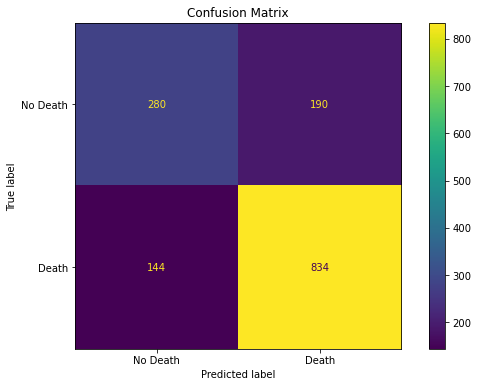

In [24]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_LSVC = LSVC.predict(X1_test)
y_pred_SUPPORT = SUPPORT.predict(X2_test)
y_pred_Doctors = Doctors.predict(X3_test)

c=confusion_matrix(y_test, y_pred_LSVC)
disp = ConfusionMatrixDisplay(c, display_labels=("No Death", "Death"))
disp.plot()
plt.title('Confusion Matrix')

#plt.savefig('Confusion Matrix.png', bbox_inches='tight')
plt.show()

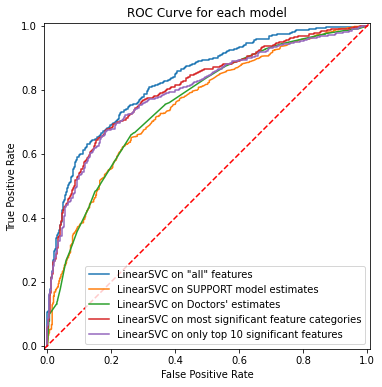

In [25]:
from sklearn.metrics import RocCurveDisplay
y_pred_LSVC = LSVC.predict(X1_test)
y_pred_SUPPORT = SUPPORT.predict(X2_test)
y_pred_Doctors = Doctors.predict(X3_test)

fig,ax=plt.subplots()

RocCurveDisplay.from_estimator(LSVC,X1_test,y_test,ax=ax,label='LinearSVC on "all" features')
RocCurveDisplay.from_estimator(SUPPORT,X2_test,y_test,ax=ax,label='LinearSVC on SUPPORT model estimates')
RocCurveDisplay.from_estimator(Doctors,X3_test,y_test,ax=ax,label='LinearSVC on Doctors\' estimates')
RocCurveDisplay.from_estimator(sig,X4_test,y_test,ax=ax,label='LinearSVC on most significant feature categories')
RocCurveDisplay.from_estimator(sig2,X5_test,y_test,ax=ax,label='LinearSVC on only top 10 significant features')
ax.axline((0, 0), slope=1, color="red",linestyle='dashed')
ax.set_title('ROC Curve for each model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

#plt.savefig('ROCcurve.png', bbox_inches='tight')
plt.show()